# **Porter Delivery time estimation**

Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers 

Porter works with a wide range of restaurants for delivering their items directly to the people.


**Problem statement**


Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time esimation, based on all those features

**Data Dictionary**

market_id : integer id for the market where the restaurant lies

created_at : the timestamp at which the order was placed

actual_delivery_time : the timestamp when the order was delivered

store_id	: encoded id for different stores

store_primary_category	: category for the restaurant

order_protocol	: integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, prebooked, third part etc)

total_items	subtotal	: final price of the order

num_distinct_items	: the number of distinct items in the order

min_item_price	: price of the cheapest item in the order

max_item_price	: price of the costliest item in order

total_onshift_partners	: number of delivery partners on duty at the time order was placed

total_busy_partners	: number of delivery partners attending to other tasks

total_outstanding_orders	: total number of orders to be fulfilled at the moment




**broad steps in the notebook**

*   load the data and understand the features
*   feature engineering creating target variable(time taken for each order)
*   cleaning the data and visualization
*   preparing the data for training
*   random forest regression
*   neural network regression
*   comarision of both ways





In [ ]:
#for reding and handling the data
import pandas as pd
import numpy as np
import os

#for visualizing and analyzing it
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#random forest model training
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as sk_mape
from sklearn.ensemble import RandomForestRegressor

#Ann training
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsolutePercentageError


from tensorflow.keras.metrics import  mean_absolute_percentage_error
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
import gdown

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [ ]:
!gdown 1ZBqyRJ9NTA7Dp94mn6xRY_6nmcDojCCZ

Downloading...
From: https://drive.google.com/uc?id=1ZBqyRJ9NTA7Dp94mn6xRY_6nmcDojCCZ
To: /content/dataset.csv
100% 23.8M/23.8M [00:00<00:00, 210MB/s]


In [ ]:
df=pd.read_csv('dataset.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


Printing the information and head of the data to get an understanding of it

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

In [ ]:
df['store_id'].value_counts()

d43ab110ab2489d6b9b2caa394bf920f    937
757b505cfd34c64c85ca5b5690ee5293    863
faacbcd5bf1d018912c116bf2783e9a1    815
cfecdb276f634854f3ef915e2e980c31    765
45c48cce2e2d7fbdea1afc51c7c6ad26    721
                                   ... 
adad0f2b196a1ed3e3b9d9025c397132      1
2e6d9c6052e99fcdfa61d9b9da273ca2      1
25daeb9b3072e9c53f66a2196a92a011      1
55285adfd78a019a3245917649e29b3c      1
df263d996281d984952c07998dc54358      1
Name: store_id, Length: 6743, dtype: int64

dropping store_id because even the most frequent store has less than 0.005% presence in the data, and would not affect the model.

also the model should not depend on store ids if new stores are added for prediction

In [ ]:
df.drop(['store_id'],axis=1,inplace=True)

# Data preprocessing

## Feature engineering
we have the time at which the order was placed and time at which it was delivired, so we will create a new column for time taken in delivery and that will be our target column

calculating time taken in delivery by subtracting the order timestamp from delivery timestamp


the time stamos that we have now are in object format and need to be convertd to datetime format for easily working with them as intended.
the pandas datetime function checks if the data is in correct format for it and also understands the order of the data and converts accordingly

In [ ]:
df['created_at']= pd.to_datetime(df['created_at'])
df['actual_delivery_time']= pd.to_datetime(df['actual_delivery_time'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196441 non-null  float64       
 1   created_at                197428 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_primary_category    192668 non-null  object        
 4   order_protocol            196433 non-null  float64       
 5   total_items               197428 non-null  int64         
 6   subtotal                  197428 non-null  int64         
 7   num_distinct_items        197428 non-null  int64         
 8   min_item_price            197428 non-null  int64         
 9   max_item_price            197428 non-null  int64         
 10  total_onshift_partners    181166 non-null  float64       
 11  total_busy_partners       181166 non-null  float64       
 12  to

In [ ]:
df['time_taken']=df['actual_delivery_time']-df['created_at']
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 196441 non-null  float64        
 1   created_at                197428 non-null  datetime64[ns] 
 2   actual_delivery_time      197421 non-null  datetime64[ns] 
 3   store_primary_category    192668 non-null  object         
 4   order_protocol            196433 non-null  float64        
 5   total_items               197428 non-null  int64          
 6   subtotal                  197428 non-null  int64          
 7   num_distinct_items        197428 non-null  int64          
 8   min_item_price            197428 non-null  int64          
 9   max_item_price            197428 non-null  int64          
 10  total_onshift_partners    181166 non-null  float64        
 11  total_busy_partners       181166 non-null  float64  

now that we have our time taken for the delivery we can convert it to minutes and that will be our target variable to train the models

the timedelta is a datatype that stores the time difference and it is better we convert it to float and converting to minute does that as well

In [ ]:
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.983333
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.066667
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.683333
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.250000
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.833333


In [ ]:
df['hour']=df['created_at'].dt.hour

In [ ]:
df['day']=df['created_at'].dt.dayofweek

In [ ]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,0 days 01:02:59,62.983333,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,0 days 01:07:04,67.066667,21,1
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,0 days 00:29:41,29.683333,20,3
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,0 days 00:51:15,51.250000,21,1
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,0 days 00:39:50,39.833333,2,6


Dropping the columns that are no longer required

In [ ]:
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   store_primary_category    192668 non-null  object 
 2   order_protocol            196433 non-null  float64
 3   total_items               197428 non-null  int64  
 4   subtotal                  197428 non-null  int64  
 5   num_distinct_items        197428 non-null  int64  
 6   min_item_price            197428 non-null  int64  
 7   max_item_price            197428 non-null  int64  
 8   total_onshift_partners    181166 non-null  float64
 9   total_busy_partners       181166 non-null  float64
 10  total_outstanding_orders  181166 non-null  float64
 11  time_taken_mins           197421 non-null  float64
 12  hour                      197428 non-null  int64  
 13  day                       197428 non-null  i

In [ ]:
df['store_primary_category'] = df['store_primary_category'].astype('category').cat.codes
#df['order_protocol'] = df['order_protocol'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   store_primary_category    197428 non-null  int8   
 2   order_protocol            196433 non-null  float64
 3   total_items               197428 non-null  int64  
 4   subtotal                  197428 non-null  int64  
 5   num_distinct_items        197428 non-null  int64  
 6   min_item_price            197428 non-null  int64  
 7   max_item_price            197428 non-null  int64  
 8   total_onshift_partners    181166 non-null  float64
 9   total_busy_partners       181166 non-null  float64
 10  total_outstanding_orders  181166 non-null  float64
 11  time_taken_mins           197421 non-null  float64
 12  hour                      197428 non-null  int64  
 13  day                       197428 non-null  i

Checking null values in the data

In [ ]:
df.isna().sum()

market_id                     987
store_primary_category          0
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
time_taken_mins                 7
hour                            0
day                             0
dtype: int64

Imputing the missing data

we will use a combination of knn and most frequent imputer
most frequent imputer for object type columns like order protocol and store category.
knn for other columns

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
si=SimpleImputer(strategy='most_frequent')
df[['order_protocol','store_primary_category']]=si.fit_transform(df[['order_protocol','store_primary_category']])


knn=KNNImputer(n_neighbors=5)
df[['total_onshift_partners','total_outstanding_orders','total_busy_partners']]=knn.fit_transform(df[['total_onshift_partners','total_outstanding_orders','total_busy_partners']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   store_primary_category    197428 non-null  float64
 2   order_protocol            197428 non-null  float64
 3   total_items               197428 non-null  int64  
 4   subtotal                  197428 non-null  int64  
 5   num_distinct_items        197428 non-null  int64  
 6   min_item_price            197428 non-null  int64  
 7   max_item_price            197428 non-null  int64  
 8   total_onshift_partners    197428 non-null  float64
 9   total_busy_partners       197428 non-null  float64
 10  total_outstanding_orders  197428 non-null  float64
 11  time_taken_mins           197421 non-null  float64
 12  hour                      197428 non-null  int64  
 13  day                       197428 non-null  i

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

market_id                   0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
time_taken_mins             0
hour                        0
day                         0
dtype: int64

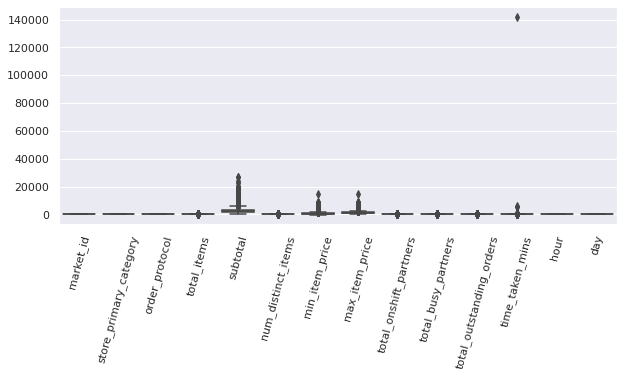

In [ ]:
plt.figure(figsize=(10,4))
sns.boxplot(data=df)
plt.xticks(rotation=75)
plt.show()

<AxesSubplot:xlabel='total_items', ylabel='subtotal'>

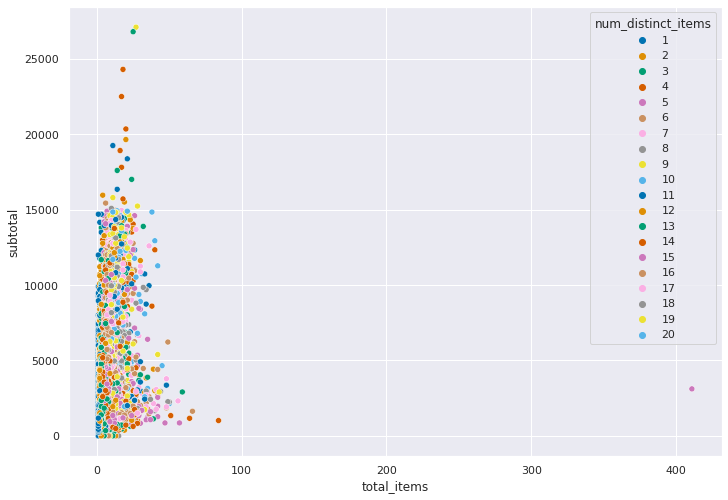

In [ ]:
sns.scatterplot(x='total_items', y='subtotal', hue='num_distinct_items',palette='colorblind', data=df)

In [ ]:

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (3 * IQR)
 upper_range = Q3 + (3 * IQR)
 return lower_range,upper_range

used outer quartile 3* IQR instead of 1.5 * IQR because with it almost 60000 rows are removed.
using 1.5 iqr or inner quartile does give a performance boost of over 3-5% MAPE, but then the data is very much limited ( delivery time range is clipped to 85 mins instead of 120+) 

In [ ]:

for col in df.columns:
  lowerbound,upperbound = outlier_treatment(df[col])
  df.drop(df[ (df[col] > upperbound) | (df[col] < lowerbound) ].index , inplace=True)


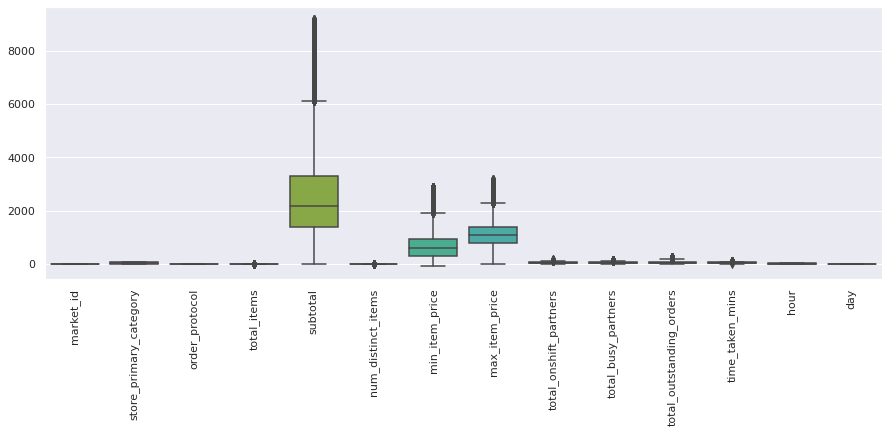

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
'''python
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1 = LocalOutlierFactor()
#model1.fit(df)
df['lof_anomaly_score'] = model1.fit_predict(df)


print("number of outliers : ",(len(df.loc[(df['lof_anomaly_score'] == -1)])))
df=df.loc[(df['lof_anomaly_score'] == 1)]

df.drop(['lof_anomaly_score'],axis=1,inplace=True)

df.info()
'''

'python\nfrom sklearn.neighbors import LocalOutlierFactor\nimport matplotlib.pyplot as plt\nmodel1 = LocalOutlierFactor()\n#model1.fit(df)\ndf[\'lof_anomaly_score\'] = model1.fit_predict(df)\n\n\nprint("number of outliers : ",(len(df.loc[(df[\'lof_anomaly_score\'] == -1)])))\ndf=df.loc[(df[\'lof_anomaly_score\'] == 1)]\n\ndf.drop([\'lof_anomaly_score\'],axis=1,inplace=True)\n\ndf.info()\n'

LOF of isolation forest can also be used

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188450 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 188450 non-null  float64
 1   store_primary_category    188450 non-null  float64
 2   order_protocol            188450 non-null  float64
 3   total_items               188450 non-null  int64  
 4   subtotal                  188450 non-null  int64  
 5   num_distinct_items        188450 non-null  int64  
 6   min_item_price            188450 non-null  int64  
 7   max_item_price            188450 non-null  int64  
 8   total_onshift_partners    188450 non-null  float64
 9   total_busy_partners       188450 non-null  float64
 10  total_outstanding_orders  188450 non-null  float64
 11  time_taken_mins           188450 non-null  float64
 12  hour                      188450 non-null  int64  
 13  day                       188450 non-null  i

We can see that after removing outliers our data is looking better

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

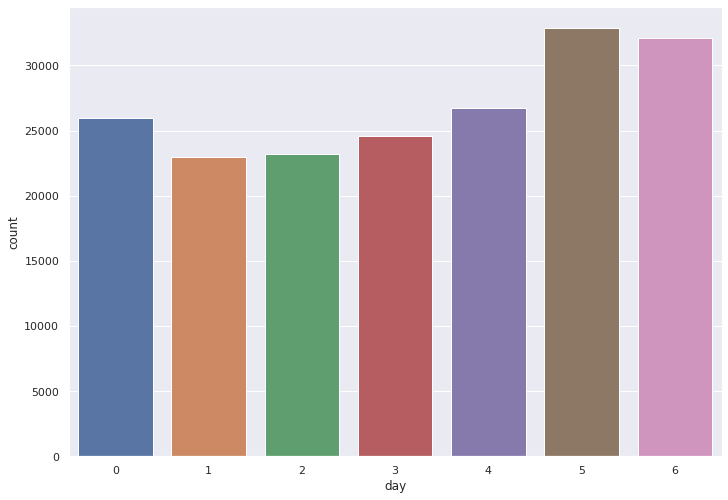

In [ ]:
sns.countplot(df.day)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hour', ylabel='count'>

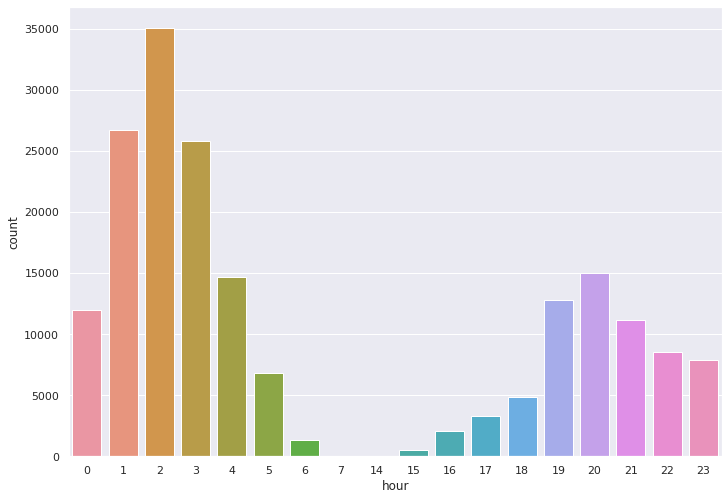

In [ ]:
sns.countplot(df.hour)

In [ ]:
print(df.nunique())

market_id                      6
store_primary_category        75
order_protocol                 7
total_items                   10
subtotal                    7019
num_distinct_items             9
min_item_price              2072
max_item_price              2321
total_onshift_partners       173
total_busy_partners          159
total_outstanding_orders     266
time_taken_mins             6144
hour                          18
day                            7
dtype: int64


## Data Spliting and modeling

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188450 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 188450 non-null  float64
 1   store_primary_category    188450 non-null  float64
 2   order_protocol            188450 non-null  float64
 3   total_items               188450 non-null  int64  
 4   subtotal                  188450 non-null  int64  
 5   num_distinct_items        188450 non-null  int64  
 6   min_item_price            188450 non-null  int64  
 7   max_item_price            188450 non-null  int64  
 8   total_onshift_partners    188450 non-null  float64
 9   total_busy_partners       188450 non-null  float64
 10  total_outstanding_orders  188450 non-null  float64
 11  time_taken_mins           188450 non-null  float64
 12  hour                      188450 non-null  int64  
 13  day                       188450 non-null  i

In [ ]:
 
x = df.drop(['time_taken_mins'], axis=1)
y=df['time_taken_mins']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(y.mean())

46.78271389404794


In [ ]:
from sklearn import preprocessing
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
#y_scaled = scaler.fit_transform(y.to_numpy().reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)

## **Random forest** 

In [ ]:

regressor = RandomForestRegressor()
 
regressor.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
prediction = regressor.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print("mse : ", mse)
print("rmse : ",rmse)
mae = mean_absolute_error(y_test, prediction)
print('mae:' ,mae)
print("r squred score : ", r2_score(y_test, prediction))

mse :  209.48718407936514
rmse :  14.47367210072707
mae: 11.077095452816838
r squred score :  0.2596861246302018


In [ ]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:

mape = MAPE(y_test, prediction)
print(mape)

26.41065483977918


feature importance

Text(0.5, 0, 'Random Forest Feature Importance')

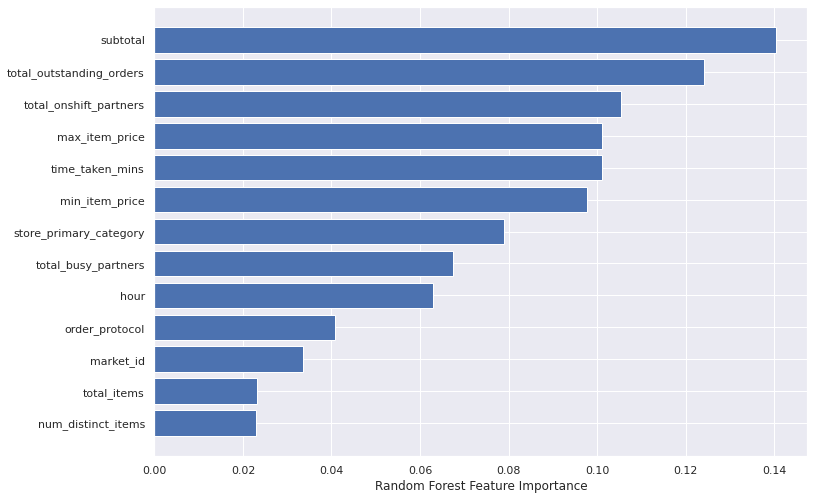

In [ ]:
sorted_idx = regressor.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], regressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## neural network for regression

We will build a simple neural network to train our regression model
it is a sequential model with three layers,

 we have kept the number of nodes in the first layers equal to the number of input columns, and for the subsequent layers anything from 32-512 or more, which can we changed or experimented with

 the activation for the layers is kept as relu because it is a great non linear activation function that works for most cases, we could have used leaky relu if we see gradient vanishing.

 the last layer has one node because it will give the single result that is our delivery time and the activation function for that should be linear

In [ ]:
print(X_train.shape)

(150760, 13)


In [ ]:
model = Sequential()
model.add(Dense(13,  kernel_initializer='normal', activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='linear'))
#model.add(Dense(1, activation='relu'))


we use adam optimizer which is extention to classic schostic gradient descent(SGD) algorithm, but handles much of its drawbacks

Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10)

In [ ]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.001)
model.compile(loss='mse', optimizer=adam, metrics=['mse','mae'])
history=model.fit(X_train, y_train, epochs=200,  verbose=1, batch_size=8000,callbacks=[early_stop],validation_split=0.2)


Epoch 1/200
16/16 [==============================] - 4s 158ms/step - loss: 2390.5845 - mse: 2390.5845 - mae: 45.9356 - val_loss: 2125.8240 - val_mse: 2125.8240 - val_mae: 43.0081
Epoch 2/200
16/16 [==============================] - 2s 149ms/step - loss: 1418.8710 - mse: 1418.8710 - mae: 32.8619 - val_loss: 384.9592 - val_mse: 384.9592 - val_mae: 15.0364
Epoch 3/200
16/16 [==============================] - 3s 218ms/step - loss: 430.2242 - mse: 430.2242 - mae: 16.2742 - val_loss: 343.3332 - val_mse: 343.3332 - val_mae: 13.7297
Epoch 4/200
16/16 [==============================] - 3s 159ms/step - loss: 328.6756 - mse: 328.6756 - mae: 13.5950 - val_loss: 302.2324 - val_mse: 302.2324 - val_mae: 13.6005
Epoch 5/200
16/16 [==============================] - 2s 146ms/step - loss: 292.5354 - mse: 292.5354 - mae: 13.1463 - val_loss: 278.0009 - val_mse: 278.0009 - val_mae: 12.6365
Epoch 6/200
16/16 [==============================] - 2s 147ms/step - loss: 277.4372 - mse: 277.4372 - mae: 12.8141 - va

we plot train and validation loss throughout training 

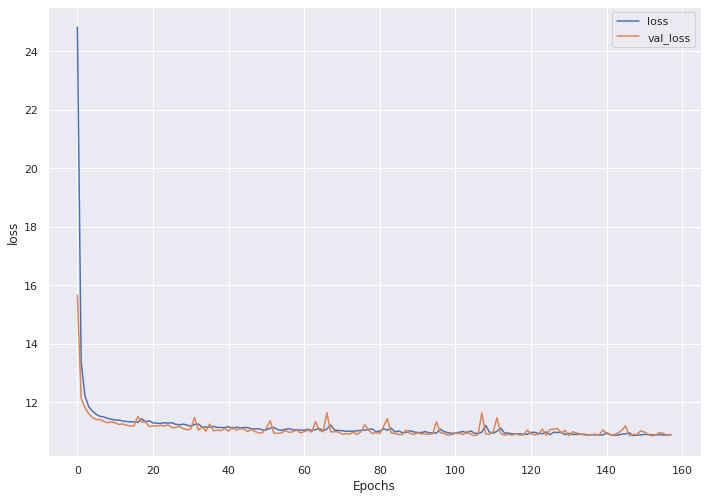

In [ ]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'loss')


In [ ]:
z= model.predict(X_test)


1178/1178 [==============================] - 4s 3ms/step


In [ ]:

print("r squred score : ", r2_score(y_test, z))

r squred score :  0.24023187486244524


In [ ]:
mse = mean_squared_error(y_test, z)
rmse = mse**.5
print("mse : ",mse)
print("rmse : ",rmse)
print("errors for neural net")
mae = mean_absolute_error(y_test, z)
print("mae : ",mae)

mse :  214.99216802983915
rmse :  14.662611228217134
errors for neural net
mae :  10.975174920984655


In [ ]:
print("mape: ",sk_mape(y_test, z))

mape:  0.251398241018323
